#### MODELS IOU COMPARISON

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: b-madorell (b-madorell-universitat-de-girona). Use `wandb login --relogin` to force relogin


MILLOR MITJANA: 0.13653700033756416
MILLOR ARXIU: iou_resnet50_50.csv


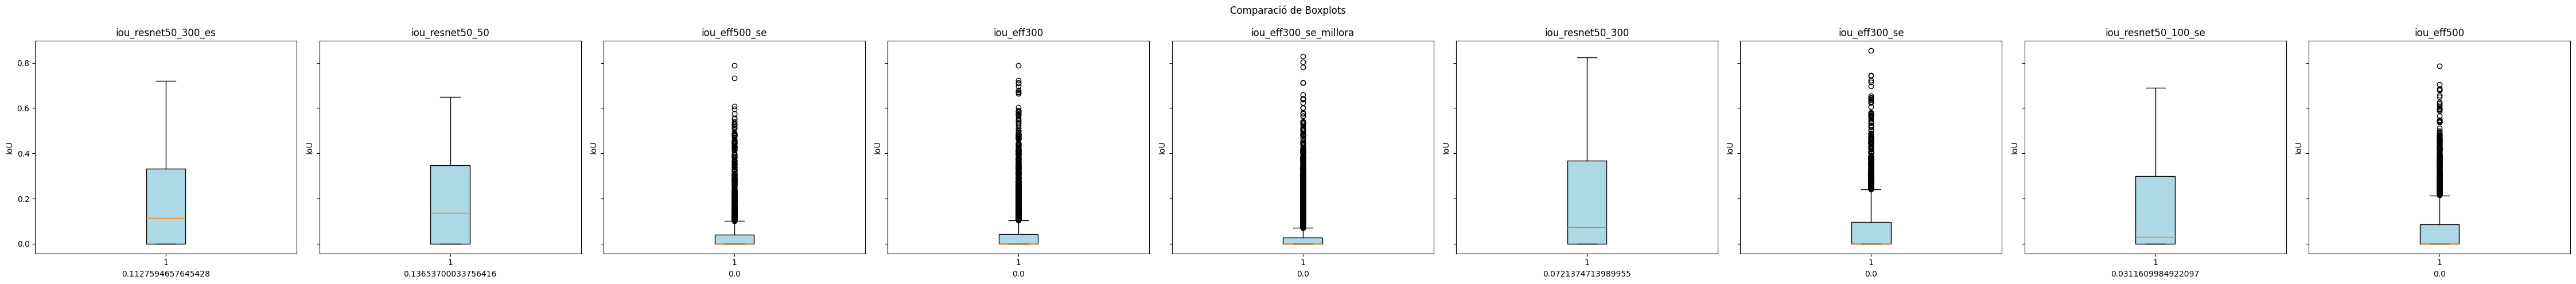

MILLOR MITJANA: 0.35419780437969084
MILLOR ARXIU: iou_resnet50_300.csv


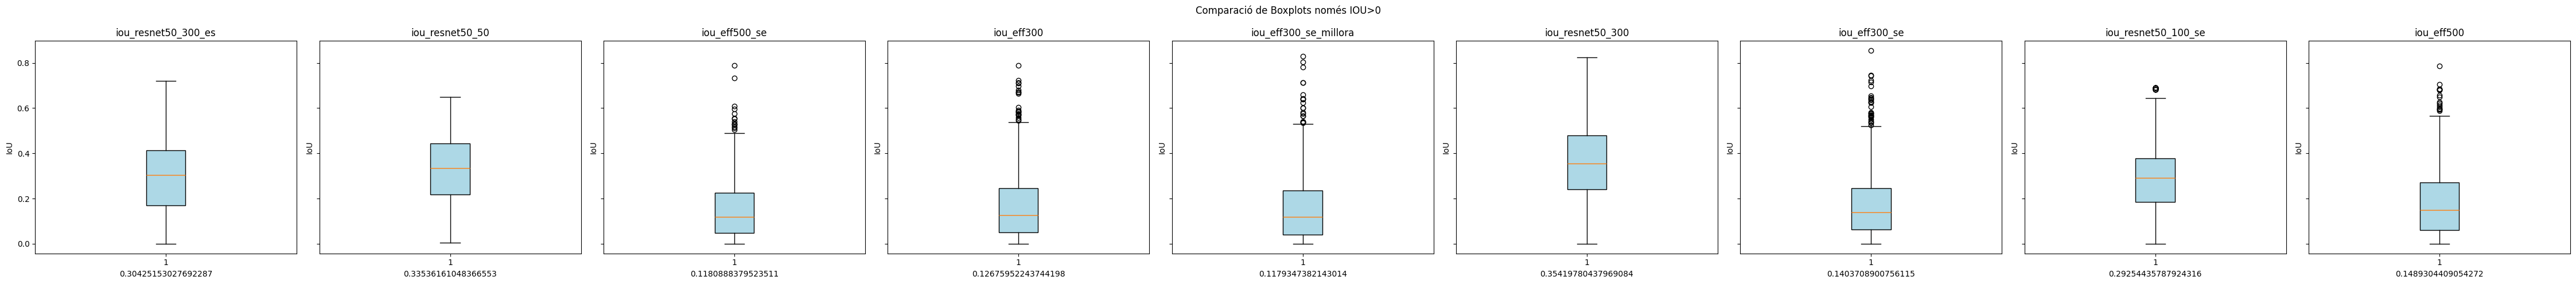

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wandb

# Initialize a Weights & Biases session
wandb.init(project="iou_models_comparison")

# Function to create subplots with boxplots from CSVs
def create_boxplot_subplots(csv_folder):
    """
    Reads multiple CSV files containing IoU values from a specified folder and generates comparative boxplots for each.
    
    - First, it creates boxplots using all IoU values.
    - Then, it filters to include only IoU values greater than 0 and creates a second set of boxplots.
    - For each case, it identifies and prints/logs the file with the highest median IoU.
    - All plots and statistics are logged to Weights & Biases (wandb) for tracking and visualization.

    Parameters:
        csv_folder (str): Path to the folder containing CSV files with an 'iou' column.
    """
    csv_files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]

    n = len(csv_files)
    fig, axes = plt.subplots(1, n, figsize=(n * 5, 5), sharey=True)

    if n == 1:
        axes = [axes]  # Handle case with a single CSV file

    best_median_total = 0
    best_file_total = ""
    
    for ax, file in zip(axes, csv_files):
        path_csv = os.path.join(csv_folder, file)
        iou_data = pd.read_csv(path_csv)
        iou_column = iou_data['iou']
        median = iou_column.median()

        if median > best_median_total:
            best_median_total = median
            best_file_total = file

        ax.boxplot(iou_column, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        ax.set_title(file.replace(".csv", ""))
        ax.set_ylabel("IoU")
        ax.set_xlabel(median)
    
    # Save the image to WandB
    wandb.log({"Boxplot Total IoU": wandb.Image(fig)})

    print(f"MILLOR MITJANA: {best_median_total}")
    print(f"MILLOR ARXIU: {best_file_total}")

    plt.suptitle(f"Comparació de Boxplots")
    plt.tight_layout()
    plt.show()

    # Second round: filter IoU > 0
    fig, axes = plt.subplots(1, n, figsize=(n * 5, 5), sharey=True)
    
    best_median_pos_iou = 0
    best_file_pos_iou = ""

    for ax, file in zip(axes, csv_files):
        path_csv = os.path.join(csv_folder, file)
        iou_data = pd.read_csv(path_csv)
        iou_filtered = iou_data['iou'][iou_data['iou'] > 0]
        median = iou_filtered.median()

        if median > best_median_pos_iou:
            best_median_pos_iou = median
            best_file_pos_iou = file

        ax.boxplot(iou_filtered, vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        ax.set_title(file.replace(".csv", ""))
        ax.set_ylabel("IoU")
        ax.set_xlabel(median)

    # Save the image to WandB
    wandb.log({"Boxplot IoU > 0": wandb.Image(fig)})

    print(f"MILLOR MITJANA: {best_median_pos_iou}")
    print(f"MILLOR ARXIU: {best_file_pos_iou}")

    plt.suptitle("Comparació de Boxplots només IOU>0")
    plt.tight_layout()
    plt.show()
    
    # Log final summary to wandb
    wandb.log({
        "Millor Mitjana Total": best_median_total,
        "Millor Arxiu Total": best_file_total,
        "Millor Mitjana IoU Pos": best_median_pos_iou,
        "BMillor Arxiu IoU Pos": best_file_pos_iou
    })

# Path to your CSV directory
csv_folder = "/home/bertam/CHALLENGE/Comparacio_iou_models/iou"

# Call the function to generate and log the plots
create_boxplot_subplots(csv_folder)


Millor Mitjana IoU Pos,▁
Millor Mitjana Total,▁
Millor Arxiu IoU Pos,iou_resnet50_300.csv...
Millor Arxiu Total,iou_resnet50_50.csv
Millor Mitjana IoU Pos,0.3542
Millor Mitjana Total,0.13654


ARXIU:: iou_resnet50_300_es.csv
Imatge: 9a61bc75-01c7-496c-b5a9-b4ad264b7885
IOU>0:
0.7192023484158315


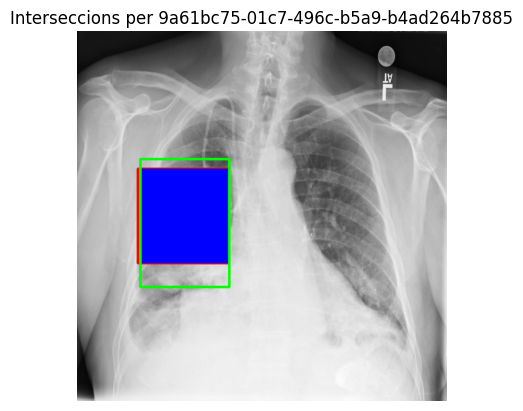

ARXIU:: iou_resnet50_50.csv
Imatge: 8a61a6c6-b600-4eb4-9bec-ea32804c03b2
IOU>0:
0.6503520097168177


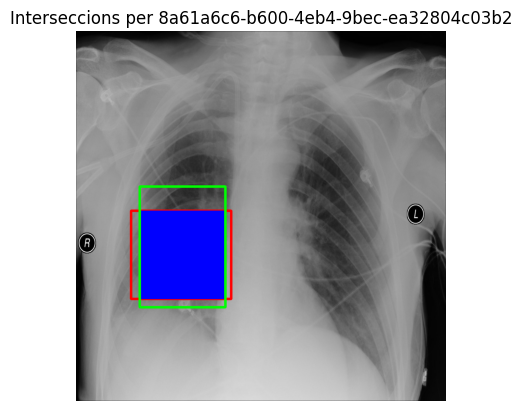

ARXIU:: iou_eff500_se.csv
Imatge: c23ecec2-d791-42fa-8abf-cb4c447f9c21
IOU>0:
0.7878186031115525
0.02991062002955873


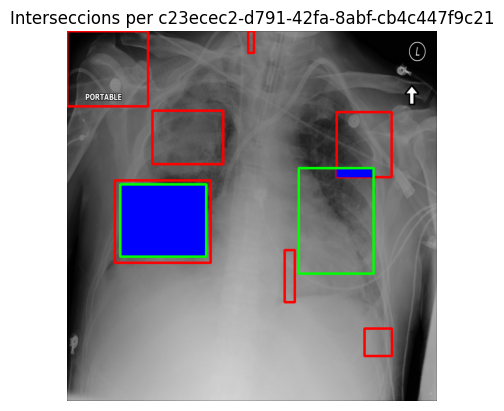

ARXIU:: iou_eff300.csv
Imatge: acfec3cb-9511-4f09-977c-87b061bd50dd
IOU>0:
0.08349521680167137
0.789961237763616


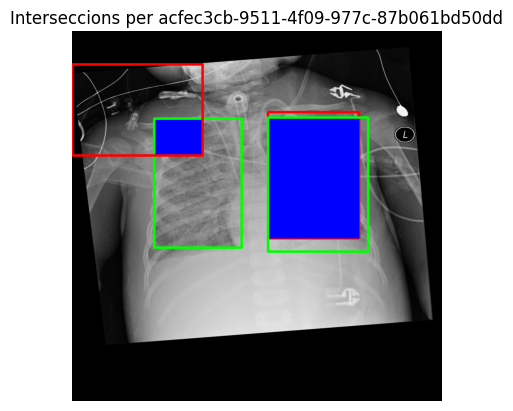

ARXIU:: iou_eff300_se_millora.csv
Imatge: bb7dca62-6180-4e52-81b6-8a9e09a4bfae
IOU>0:
0.05272052681676023
0.8291638084305134


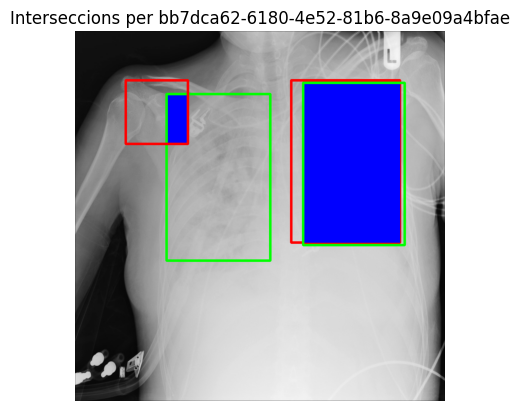

ARXIU:: iou_resnet50_300.csv
Imatge: c424b446-ced5-4ab5-a097-41b6e496146d
IOU>0:
0.824760313482118
0.47896772516007413
0.034956608527367664


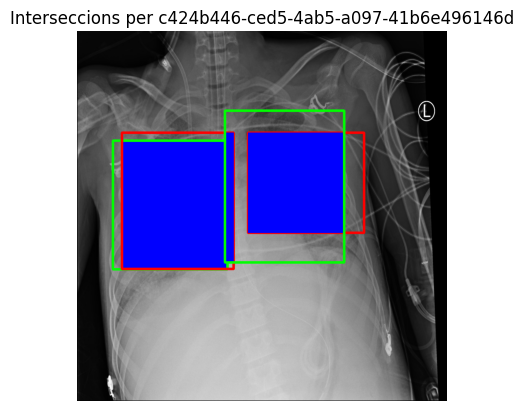

ARXIU:: iou_eff300_se.csv
Imatge: 8d48694a-f998-4043-bc98-63a3c18527f2
IOU>0:
0.17299661960628354
0.022649584789175167
0.8554808116453463


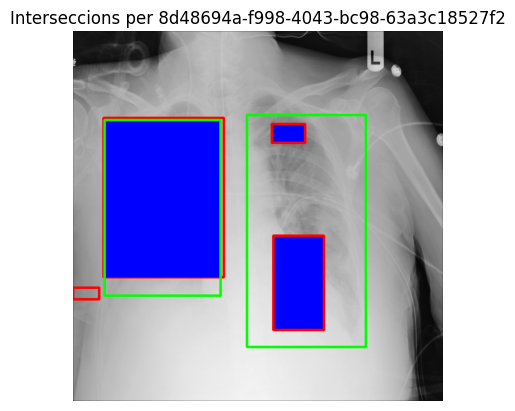

ARXIU:: iou_resnet50_100_se.csv
Imatge: 784aa072-7400-4f08-869c-7d47230d198d
IOU>0:
0.3022041927888571
0.6906145159970543


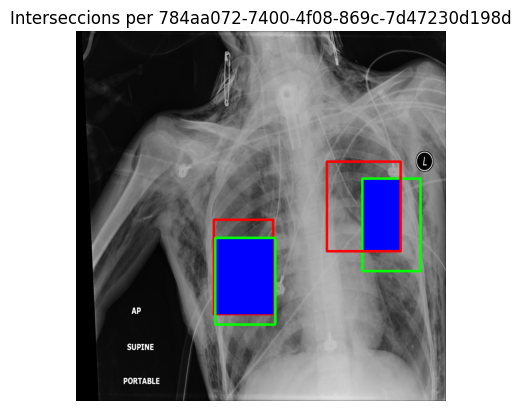

ARXIU:: iou_eff500.csv
Imatge: c573cb3e-54e6-4ff0-bda4-1fd7621ee0cf
IOU>0:
0.15545479781623023
0.7874171222956685


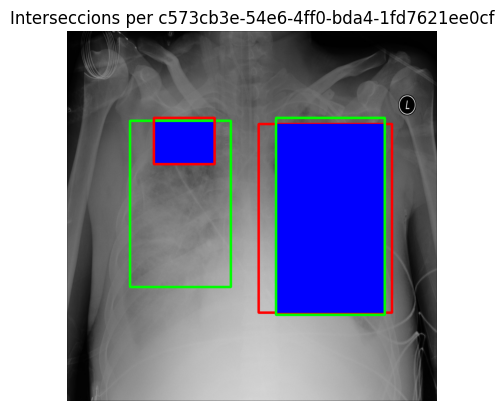

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import importlib
import Codi_simple

# Reload the module to ensure it's up to date
importlib.reload(Codi_simple)

# Start a Weights & Biases session
wandb.init(project="comparacio_iou_models_millor_im")

# Path to ground truth bounding boxes CSV
ground_truth_csv = '/home/bertam/CHALLENGE/stage_2_train_labels.csv'

def mostrar_imatge_millor_iou(carpeta_csv):
    """
    Finds and visualizes the image with the highest IoU from each CSV file in a directory.

    For each CSV:
        - Loads IoU values.
        - Identifies the image with the highest IoU.
        - Retrieves corresponding predicted and ground truth bounding boxes.
        - Draws and displays intersections on the image.
        - Logs the image and related metrics to Weights & Biases (wandb).

    Input:
        carpeta_csv: Path to the folder containing IoU CSV files.
    """
    csv_files = [f for f in os.listdir(carpeta_csv) if f.endswith(".csv")]

    for csv_file in csv_files:
        csv_path = os.path.join(carpeta_csv, csv_file)
        df_iou = pd.read_csv(csv_path)
        max_iou_row = df_iou[df_iou['iou'] == df_iou['iou'].max()]
        best_image_name = max_iou_row['Filename'].values[0]
        print(f"FILE: {csv_file}")

        # Paths for predicted bounding boxes and images
        bb_folder = "/home/bertam/CHALLENGE/Comparacio_iou_models/bb"
        bb_filename = csv_file.replace("iou", "bb")
        predicted_bb_csv = os.path.join(bb_folder, bb_filename)

        image_folder = '/home/nuria/rsna-pneumonia-challenge/dataset_three_class/images/val/'
        image_path = os.path.join(image_folder, f"{best_image_name}.png")

        # Load bounding boxes
        ground_truth_boxes = Codi_simple.read_csv(ground_truth_csv)
        predicted_boxes = Codi_simple.read_csv(predicted_bb_csv)

        print(f"Image: {best_image_name}")

        # Draw all intersections
        image_with_boxes = Codi_simple.draw_intersections(
            image_path,
            ground_truth_boxes[best_image_name],
            predicted_boxes[best_image_name],
            csv_file
        )

        if image_with_boxes is not None:
            # Display image locally
            plt.imshow(image_with_boxes)
            plt.axis('off')
            plt.title(f"Interseccions per {best_image_name}")
            plt.show()

            # Log image and metrics to wandb
            wandb.log({"Imatge amb interseccions": wandb.Image(image_with_boxes)})
            wandb.log({
                "Millor IoU": max_iou_row['iou'].values[0],
                "Arxiu": csv_file,
                "Imatge": best_image_name
            })


# Directory containing IoU CSV files
carpeta_csv = "/home/bertam/CHALLENGE/Comparacio_iou_models/iou"

# Run the visualization and logging function
mostrar_imatge_millor_iou(carpeta_csv)